In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cafe Sales/Cleaned_DataSet.csv')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Transaction Date
0,TXN_1961373,coffee,2.0,2.0,4.0,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,2023-05-16
2,TXN_4271903,cookie,4.0,1.0,8.0,2023-07-19
3,TXN_7034554,salad,2.0,5.0,10.0,2023-04-27
4,TXN_3160411,coffee,2.0,2.0,4.0,2023-06-11
...,...,...,...,...,...,...
9736,TXN_7672686,coffee,2.0,2.0,4.0,2023-08-30
9737,TXN_9659401,juice,3.0,3.0,3.0,2023-06-02
9738,TXN_5255387,coffee,4.0,2.0,8.0,2023-03-02
9739,TXN_7695629,cookie,3.0,3.0,3.0,2023-12-02


# EDA

In [3]:
df.shape

(9741, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9741 entries, 0 to 9740
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9741 non-null   object        
 1   Item              9741 non-null   object        
 2   Quantity          9741 non-null   float64       
 3   Price Per Unit    9741 non-null   float64       
 4   Total Spent       9741 non-null   float64       
 5   Transaction Date  9741 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 456.7+ KB


In [5]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9741.000000,9741.000000,9741.000000,9741
mean,2.977312,2.901499,8.449287,2023-06-25 04:12:29.491838720
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-03-19 00:00:00
50%,3.000000,3.000000,8.000000,2023-06-23 00:00:00
75%,4.000000,4.000000,12.000000,2023-09-27 00:00:00
max,5.000000,5.000000,20.000000,2023-12-31 00:00:00
std,1.366510,1.217124,5.307016,NaN


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
outlier_report = []
numeric_df = df.select_dtypes(include=['int64'])
for i in numeric_df:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        outliers_count = ((df[i] < lower_bound) | (df[i] > upper_bound)).sum()
        percentage = (outliers_count / len(df)) * 100
        outlier_report.append({
            'Column': i,
            'Outliers': outliers_count,
            'Percentage (%)': round(percentage, 2)
        })
report_df = pd.DataFrame(outlier_report)
report_df.head()

""


In [8]:
null_count = df.isnull().sum()
null_percentage = (null_count / len(df)) * 100
report = pd.DataFrame({
        'Missing Values': null_count,
        'Percentage (%)': round(null_percentage, 2)
    }).sort_values(by='Percentage (%)', ascending=False)
report.head()

,Missing Values,Percentage (%)
Transaction ID,0,0.0
Item,0,0.0
Quantity,0,0.0
Price Per Unit,0,0.0
Total Spent,0,0.0


In [9]:
for n in df.columns:
  print(n)
  print(df[n].unique())
  print("------------------------------------")

Transaction ID
['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
------------------------------------
Item
['coffee' 'cake' 'cookie' 'salad' 'smoothie' 'unknown' 'sandwich' 'juice'
 'error' 'tea']
------------------------------------
Quantity
[2. 4. 5. 3. 1.]
------------------------------------
Price Per Unit
[2.  3.  1.  5.  4.  1.5]
------------------------------------
Total Spent
[ 4.  12.   8.  10.  20.   9.  16.  15.   5.   3.   6.   2.   1.   7.5
  4.5  1.5]
------------------------------------
Transaction Date
<DatetimeArray>
['2023-09-08 00:00:00', '2023-05-16 00:00:00', '2023-07-19 00:00:00',
 '2023-04-27 00:00:00', '2023-06-11 00:00:00', '2023-03-31 00:00:00',
 '2023-10-06 00:00:00', '2023-10-28 00:00:00', '2023-07-28 00:00:00',
 '2023-12-31 00:00:00',
 ...
 '2023-01-20 00:00:00', '2023-03-04 00:00:00', '2023-11-11 00:00:00',
 '2023-02-13 00:00:00', '2023-07-30 00:00:00', '2023-02-17 00:00:00',
 '2023-05-20 00:00:00', '2023-11-05 00:0

In this section, I analyzed the values ​​and variables within our database to ensure they were free of outliers and null values. Fortunately, they were free of these, but they contained error and unknown values ​​in the item column, which I left as is to study its impact on calculations.

# analyze

In [10]:
#What is the total revenue generated by the store?
# What was the total revenue generated by the store during the months?
print("avrge total spent",df['Total Spent'].mean())
avg_qty_per_trans = df['Quantity'].mean()
print("What is the average quantity of items purchased per transaction? ",avg_qty_per_trans)

avrge total spent 8.449286520891079
What is the average quantity of items purchased per transaction?  2.9773123909249564


Based on these answers, we find that a person usually buys about 3 items worth $8.50 on average.

In [11]:
#What is the total revenue generated by the store?
print("What is the total revenue generated by the store ? ",df['Total Spent'].sum())

What is the total revenue generated by the store ?  82304.5


In [12]:
total = df.pivot_table(index=df['Transaction Date'].dt.to_period('M'), values='Total Spent', aggfunc='sum')
total

,Total Spent
Transaction Date,
2023-01,6596.0
2023-02,10180.0
2023-03,6648.0
2023-04,6638.5
2023-05,6520.0
2023-06,6877.5
2023-07,6210.0
2023-08,6487.0
2023-09,6479.5


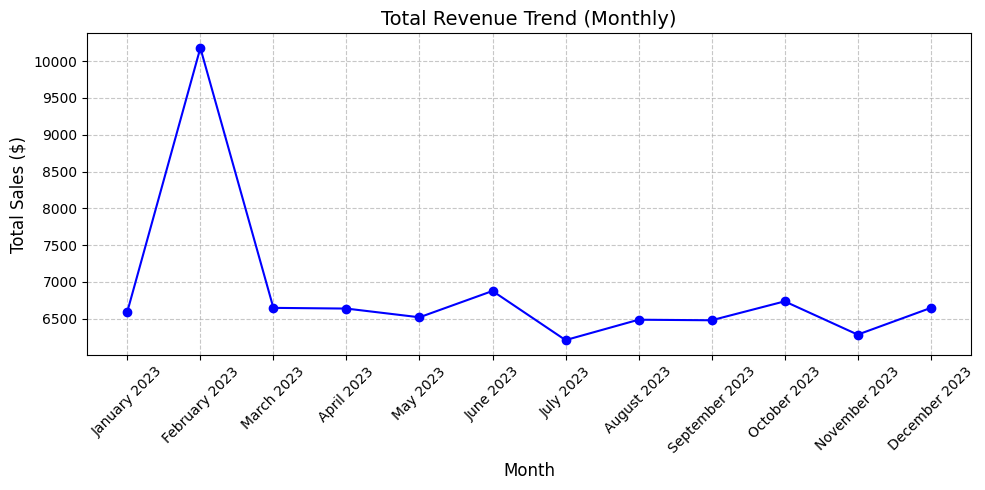

In [21]:
monthly_sales = df.resample('MS', on='Transaction Date')['Total Spent'].sum()

# 3. Visualization
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.strftime('%B %Y'), monthly_sales.values, marker='o', linestyle='-', color='b')

# Adding labels and style
plt.title('Total Revenue Trend (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

This table shows that profits were considered normal between 6k and 7k, but they exploded to 10k in the second month, meaning an event occurred that month that caused sales to skyrocket. Therefore, if this is a recurring event like a festival or holiday, we should prepare our warehouses to achieve the highest possible profit.

In [14]:
monthly_summary = df.pivot_table(index=df['Transaction Date'].dt.to_period('M'), columns='Item', values='Quantity', aggfunc='sum',fill_value=0)
monthly_summary

Item,cake,coffee,cookie,error,juice,salad,sandwich,smoothie,tea,unknown
Transaction Date,,,,,,,,,,
2023-01,289.0,281.0,249.0,83.0,382.0,191.0,348.0,191.0,264.0,62.0
2023-02,417.0,412.0,376.0,108.0,568.0,286.0,414.0,399.0,459.0,117.0
2023-03,270.0,322.0,270.0,80.0,380.0,179.0,295.0,249.0,258.0,67.0
2023-04,270.0,262.0,218.0,72.0,401.0,208.0,257.0,285.0,243.0,75.0
2023-05,277.0,250.0,269.0,72.0,352.0,166.0,296.0,266.0,229.0,81.0
2023-06,258.0,301.0,257.0,45.0,393.0,219.0,273.0,286.0,262.0,89.0
2023-07,238.0,292.0,296.0,86.0,274.0,179.0,263.0,266.0,261.0,66.0
2023-08,278.0,299.0,251.0,54.0,325.0,177.0,255.0,261.0,288.0,96.0
2023-09,288.0,231.0,256.0,71.0,326.0,171.0,281.0,295.0,280.0,96.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

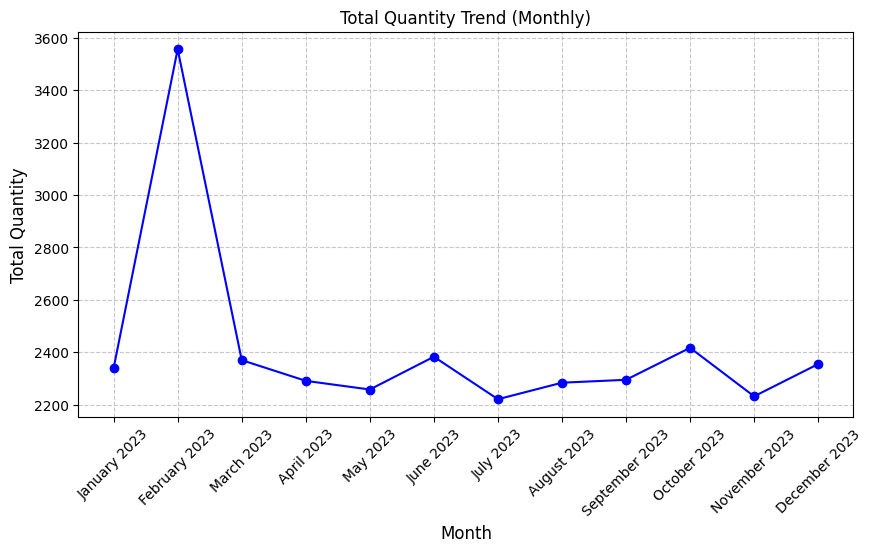

In [23]:
monthly_sales = df.resample('MS', on='Transaction Date')['Quantity'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.strftime('%B %Y'), monthly_sales.values, marker='o', linestyle='-', color='b')

plt.title('Total Quantity Trend (Monthly)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt

Because the quantity sold in the second month is proportional to the size of the profits, this negates the hypothesis of increased profits.

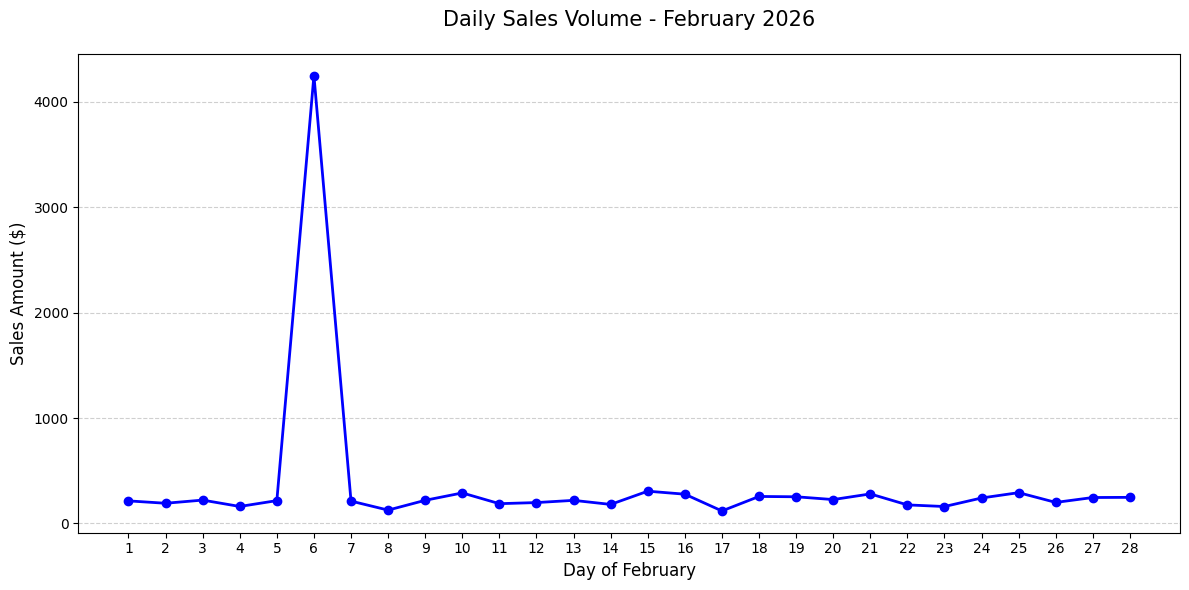

In [36]:
february_sales = df[df['Transaction Date'].dt.month == 2]
daily_feb = february_sales.groupby(february_sales['Transaction Date'].dt.day)['Total Spent'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_feb.index, daily_feb.values, marker='o', linestyle='-', color='b', linewidth=2)

plt.title('Daily Sales Volume - February 2026', fontsize=15, pad=20)
plt.xlabel('Day of February', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.xticks(range(1, 29))
plt.grid(True, axis='y', linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

In [39]:
target_date = '2023-02-06'
day_data = df[df['Transaction Date'].dt.date == pd.to_datetime(target_date).date()]
excluded = ['unknown', 'error']
clean_day_data = day_data[~day_data['Item'].isin(excluded)]
top_products = clean_day_data.groupby('Item')['Quantity'].sum().sort_values(ascending=False)


print(target_date)
print(top_products.head(1))

2023-02-06
Item
juice    250.0
Name: Quantity, dtype: float64


The graph shows that most of the profits were concentrated on the sixth day, which means it was a global day, as profits did not decrease, indicating no reduction of any kind. It seems to have been a global day specifically for juice.

In [40]:
summary = df.pivot_table(index=df['Transaction Date'].dt.to_period('M'), columns='Item', values='Quantity', aggfunc='sum',fill_value=0)
top = summary.idxmax(axis=1)
top_value = summary.max(axis=1)
report = pd.DataFrame({
    'top': top,
    'valuse': top_value
})
report

,top,valuse
Transaction Date,,
2023-01,juice,382.0
2023-02,juice,568.0
2023-03,juice,380.0
2023-04,juice,401.0
2023-05,juice,352.0
2023-06,juice,393.0
2023-07,cookie,296.0
2023-08,juice,325.0
2023-09,juice,326.0


Based on the table, the best-selling product in terms of quantity is juice throughout the year except for June, which shows that juice is the most popular product in the store.

In [25]:
#lowest prodect selling in eche month
summary = df.pivot_table(index=df['Transaction Date'].dt.to_period('M'), columns='Item', values='Quantity', aggfunc='sum',fill_value=0)
excluded_cols = ['unknown', 'error']
summary = summary.drop(columns=excluded_cols)
lowest_Id = summary.idxmin(axis=1)
lowest_count = summary.min(axis=1)
report = pd.DataFrame({
    'low Product': lowest_Id,
    'Quantity': lowest_count
})
report

,low Product,Quantity
Transaction Date,,
2023-01,salad,191.0
2023-02,salad,286.0
2023-03,salad,179.0
2023-04,salad,208.0
2023-05,salad,166.0
2023-06,salad,219.0
2023-07,salad,179.0
2023-08,salad,177.0
2023-09,salad,171.0


Since the salad was the least popular product, it would have been better to get rid of it and fill the stock with other products. However, the salad has a high profit margin, so it is preferable to revive it and put in place promotional plans to try to make it popular.

In [49]:
loss = df[(df['Item'] == 'error') | (df['Item'] == 'unknown')]['Total Spent'].sum()
loss

np.float64(5123.0)

According to the database we started with, the cost of loss for error and unknown values ​​was around five thousand dollars because we couldn't analyze them. These values ​​are considered useless and cause a waste of computational resources for both the analyst and the store itself. This cost is considered high when you consider that the average income for this store is thousands of dollars per month.